In [12]:
import cv2

import tensorflow as tf

tf.__version__


'2.8.2'

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
pwd

'/content/drive/My Drive/Traffic_sign_Recognition'

In [15]:
cd /content/drive/MyDrive/Traffic_sign_Recognition

/content/drive/MyDrive/Traffic_sign_Recognition


In [16]:
pwd


'/content/drive/MyDrive/Traffic_sign_Recognition'

In [17]:
link = "/content/drive/MyDrive/Traffic_sign_Recognition/traffic-signs-data.zip"

In [18]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3dda77897c2496d58aceb14259e32b387525a9612267784932594fb7eea5dd99
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [19]:
import wget

In [20]:
data = "./"

In [21]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [22]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [23]:
import pickle

In [24]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [25]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [26]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [27]:
trainX = train["features"]
trainY = train["labels"]

In [28]:
trainX.shape

(34799, 32, 32, 3)

In [29]:
trainX[0].shape

(32, 32, 3)

In [30]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [31]:
len(trainX)

34799

In [32]:
import matplotlib.pyplot as plt


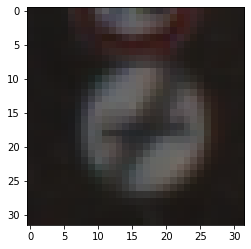

In [33]:
plt.imshow(trainX[0])

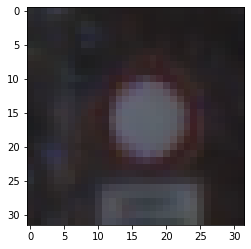

In [34]:
plt.imshow(trainX[30000])

In [35]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [36]:
classNames[trainY[0]]

'End of no passing'

- Ban đầu các ảnh giống nhau được đặt liền nhau nên khi mà train model theo từng phần một , mà mỗi một phần lại có những ảnh giống y hệt nhau thì nó sẽ ảnh hưởng đến tính tổng quát của phần đó . đó là lý do vì sao chúng ta phải cháo tất cả ảnh lên và cháo luôn cả nhãn

In [37]:
from sklearn.utils import shuffle

In [38]:
trainX, trainY = shuffle(trainX, trainY)

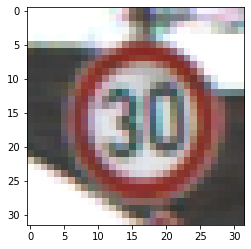

In [39]:
plt.imshow(trainX[2])

In [40]:
validX = valid["features"]
validY = valid["labels"]

In [41]:
testX= test["features"]
testY = test["labels"]

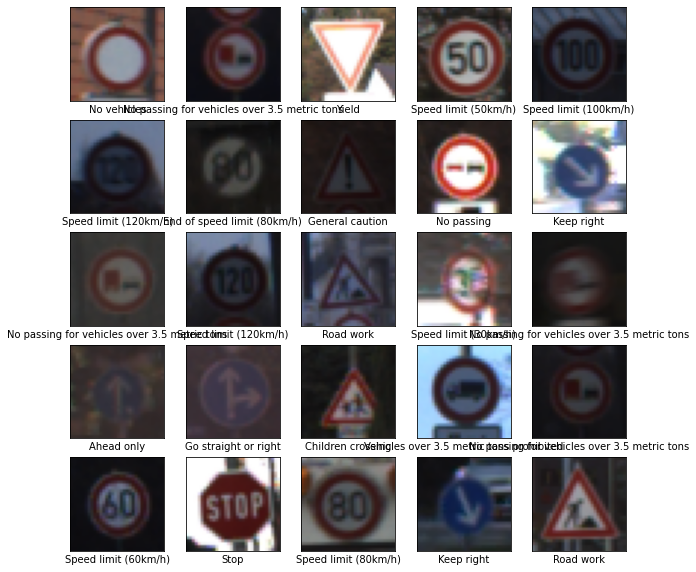

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i+250], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classNames[trainY[i+250]])
plt.show()

chuẩn hoá : giúp cho sự ảnh hưởng giữa các data point lên cái việc training nó tương đồng nhau nhiều hơn . đưa về khoảng từ 0 đến 1 thay vì từ 0 đến 255 nên việc thiên vị sẽ bị giảm thiểu


In [43]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [44]:
from sklearn.preprocessing import LabelBinarizer

In [45]:
lb = LabelBinarizer()

In [46]:
trainY =lb.fit_transform(trainY)


In [47]:
validY = lb.fit_transform(validY)

In [48]:
valid["labels"][0]

41

In [49]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

xây dựng mạng

In [50]:
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD






**KHỞI TẠO MODEL**

In [51]:
model = Sequential()

In [52]:
width = 32
height = 32
classes = 43

In [53]:
shape = (width , height, 3)

In [54]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [55]:
model.add(Activation("relu"))

In [56]:
model.add(BatchNormalization())

In [57]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [58]:
model.add(Activation("relu"))

In [59]:
model.add(BatchNormalization())

In [60]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [61]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [62]:
model.add(Activation("relu"))

In [63]:
model.add(BatchNormalization())


In [64]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [65]:
model.add(Activation("relu"))

In [66]:
model.add(BatchNormalization())

In [67]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(512))

In [70]:
model.add(Activation("relu"))

In [71]:
model.add(BatchNormalization())

In [72]:
model.add(Dense(classes))

In [73]:
model.add(Activation("softmax"))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [75]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [76]:
learning_rate = 0.01

In [77]:
epochs = 10
# epoch
# Steps
# 
batch_size = 32

In [78]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [79]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [80]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
1087/1087 [==============================] - 32s 27ms/step - loss: 1.9628 - accuracy: 0.4376 - val_loss: 2.1006 - val_accuracy: 0.4481
Epoch 2/10
1087/1087 [==============================] - 21s 19ms/step - loss: 0.7218 - accuracy: 0.7593 - val_loss: 0.7656 - val_accuracy: 0.7703
Epoch 3/10
1087/1087 [==============================] - 23s 21ms/step - loss: 0.3552 - accuracy: 0.8816 - val_loss: 0.7411 - val_accuracy: 0.7959
Epoch 4/10
1087/1087 [==============================] - 20s 19ms/step - loss: 0.2256 - accuracy: 0.9251 - val_loss: 0.5634 - val_accuracy: 0.8365
Epoch 5/10
1087/1087 [==============================] - 21s 19ms/step - loss: 0.1578 - accuracy: 0.9480 - val_loss: 0.6383 - val_accuracy: 0.8363
Epoch 6/10
1087/1087 [==============================] - 21s 19ms/step - loss: 0.1260 - accuracy: 0.9590 - val_loss: 0.4461 - val_accuracy: 0.8957
Epoch 7/10
1087/1087 [==============================] - 21s 19ms/step - loss: 0.1037 - accuracy: 0.9658 - val

In [81]:
model.save("traffic.h5")

In [82]:
import matplotlib.pyplot as plt


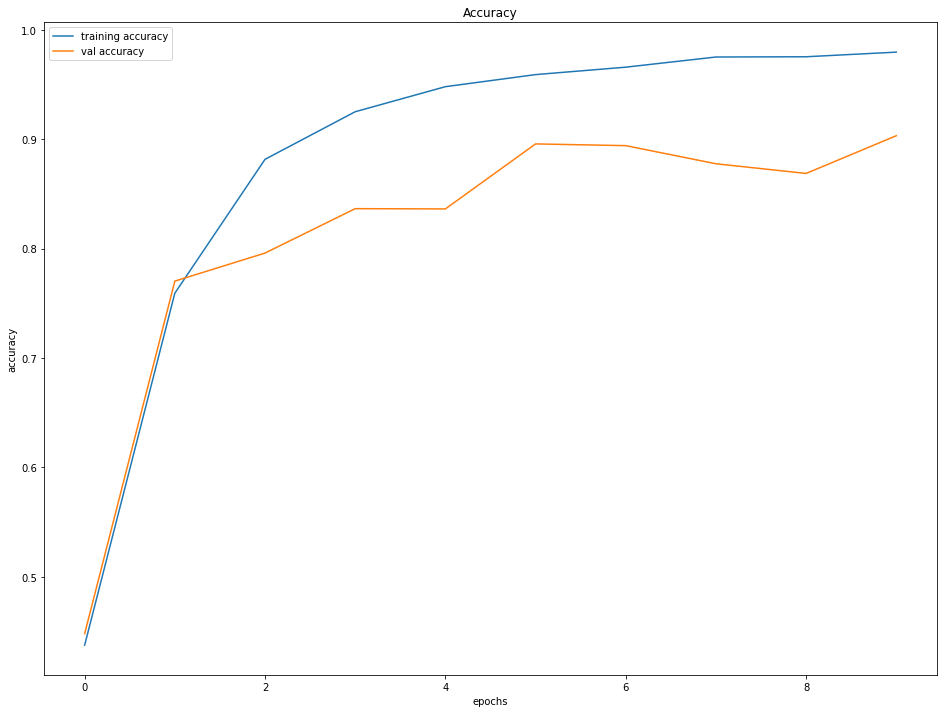

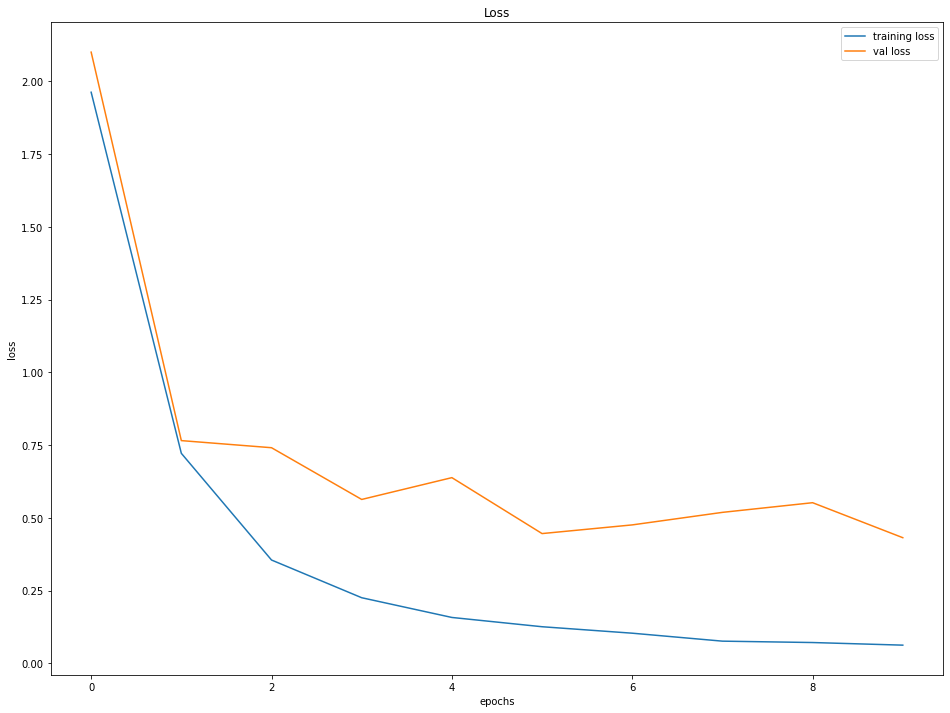

In [83]:
plt.figure(figsize=(16, 12))
plt.plot(H.history['accuracy'], label='training accuracy')
plt.plot(H.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(16, 12))
plt.plot(H.history['loss'], label='training loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [84]:
saved_model = tf.keras.models.load_model("traffic.h5")

In [85]:
result = saved_model.predict(testX[3:4])
print(result.shape)

(1, 43)


In [86]:
import numpy as np

In [87]:
final = np.argmax(result)

In [88]:
final = classNames[final]

In [89]:
final

'Ahead only'

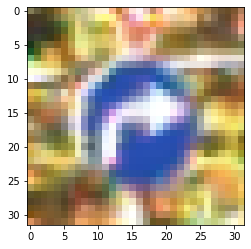

In [90]:
plt.imshow(test["features"][3])

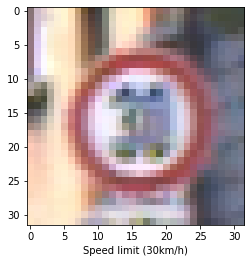

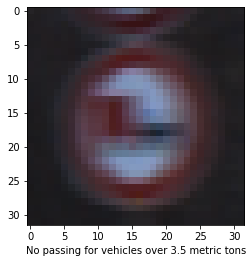

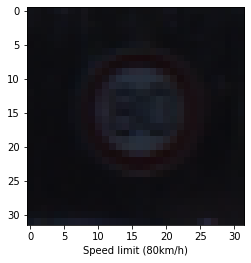

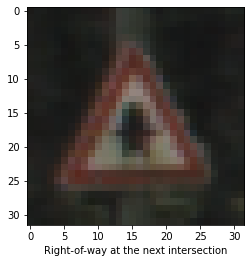

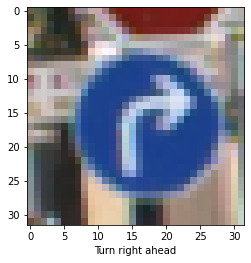

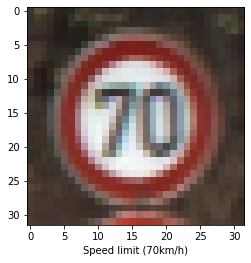

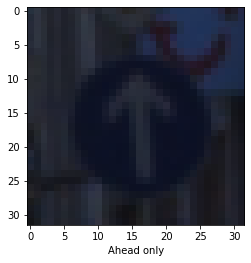

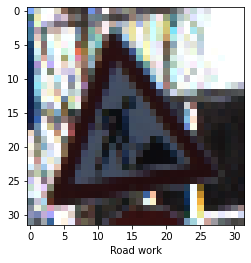

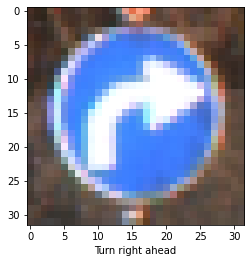

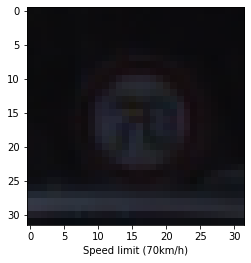

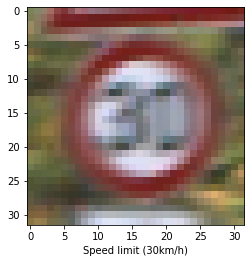

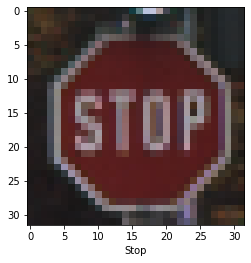

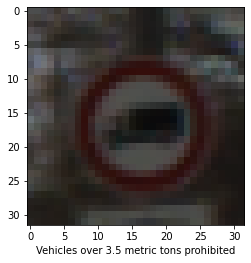

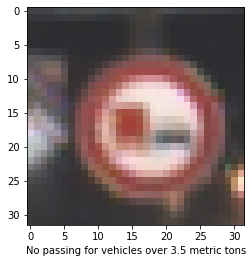

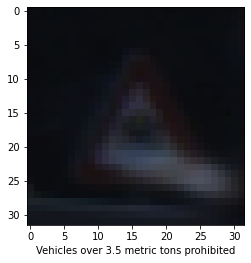

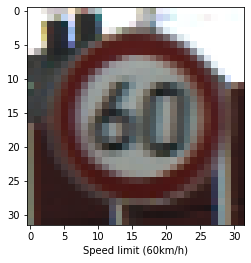

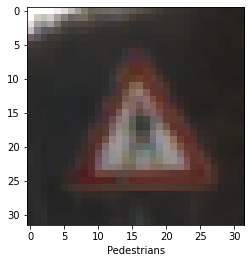

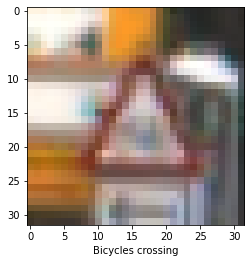

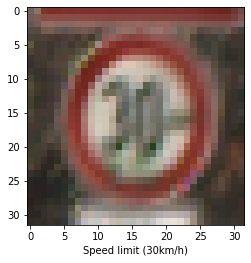

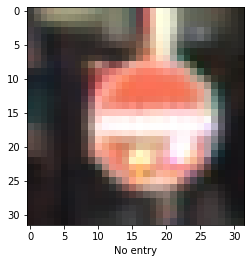

In [93]:
import cv2
from moviepy.editor import VideoFileClip
import os
import glob
import imutils

IMG_SIZ = 32
IMG_CHANNEL = 3
MODE=1 #1- iamgefromtest , 2- iamge ,3-image but not forcus sign, 4 video
model = tf.keras.models.load_model("traffic.h5")
if MODE==1:
  for i in range (100,120):
  #i=164#anh thu i
    result = model.predict(testX[i:i+1])
    #plt.imshow(testX[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(result)
    #cv2.putText(testX[i], classNames[predicted_label], (1, 2), cv2.FONT_HERSHEY_SIMPLEX,0.1, (0, 0, 255), 2)
    image = imutils.resize(testX[i], width=32)
    plt.figure(i-100)
    #print(result)
    plt.xlabel(classNames[predicted_label])
    #print(classNames[predicted_label])
    plt.imshow(image)


if MODE==2:
  img=cv2.imread("anh9.jpg",cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img, cmap=plt.cm.binary)
  img = cv2.resize(img, (IMG_SIZ, IMG_SIZ))
  img = np.asarray(img)
  img = img.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
  img = img.astype("float")/255.0
  result = model.predict(img)
  predicted_label = np.argmax(result)
  print(result)
  print('acr',np.max(result))
  print(classNames[predicted_label])
  image = cv2.imread("anh9.jpg",cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = imutils.resize(image, width=256)
  cv2.putText(image, classNames[predicted_label], (5, 15), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 0, 255), 2)
  plt.imshow(image)
  #cv2.imshow(img)
  cv2.waitKey(0)
if MODE==3:
  targetImage = cv2.imread('anh12.PNG',cv2.COLOR_BGR2RGB)
  targetImage = cv2.cvtColor(targetImage, cv2.COLOR_BGR2RGB)
  #targetImage = cv2.GaussianBlur(targetImage, (15, 15), 0)

  targetImage = imutils.resize(targetImage, width=500)

  prototypeImg = cv2.imread('anh1.png',cv2.COLOR_BGR2RGB)
  prototypeImg = cv2.cvtColor(prototypeImg, cv2.COLOR_BGR2RGB)
  prototypeImg  = imutils.resize(prototypeImg , height=32,width=32)
  (tempH, tempW) =prototypeImg.shape[:2]
  result = cv2.matchTemplate(targetImage, prototypeImg, cv2.TM_CCOEFF)
  (minVal, maxVal, minLoc, (x, y)) = cv2.minMaxLoc(result)
  buff=15
  cv2.rectangle(targetImage, (x-buff, y-buff), (x + tempW+buff, y + tempH+buff), (0, 255, 0), 2)
  plt.figure(0)
  plt.imshow(targetImage)
  region= targetImage[ (y-buff):(y + tempH+buff), (x-buff):(x + tempW+buff)]
  region_c = cv2.resize(region,(IMG_SIZ, IMG_SIZ))
  region_c = np.asarray(region_c)
  region_c = region_c.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
  region_c = region_c.astype("float")/255.0
  #print("size region", region.shape)
  result = model.predict(region_c)
  final = np.argmax(result)
  arr= np.max(result)
  final = classNames[final]
  plt.figure(1)
  region = cv2.resize(region,(128, 128))
  cv2.putText(region, final, (5, 15), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 0, 255), 2)
  plt.imshow(region)
  print("future : ",final) 
  cv2.waitKey(0)
if MODE==4:
# change the video path here
  cap = cv2.VideoCapture("/content/drive/.shortcut-targets-by-id/1wz_2ypEoa_Relsw44iZcPD-JL0VtGjRt/Traffic_sign_Recognition/bien3.mp4")
  i= 0
  k=0

  square=160
  #check=[]
  check = [None] * 10000
  while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
      break
    print(frame.shape)
  # frame = cv2.resize(frame, (IMG_SIZ, IMG_SIZ))
    #frame = np.asarray(frame)
    #frame = frame.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
    #frame = frame.astype("float")/255.0
    #resul = saved_model.predict(frame)
    #fina = np.argmax(resul)
    #fina = classNames[fina]

    #plt.imshow(resul )

    #print("future : ",final)

    frame = np.asarray(frame)
    size=frame.shape 
    #size = [161,161]
    
    for i in range(0, size[0] -square):
      for j in range(0, size[1] - square):
        region= frame[i:i+square,j:j+square]
        region = cv2.resize(region,(IMG_SIZ, IMG_SIZ))
        region = np.asarray(region)
        region = region.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
        region = region.astype("float")/255.0
        #print("size region", region.shape)
        
        result = model.predict(region)
        final = np.argmax(result)
        arr= np.max(result)
        #arr= double(arr)
        #print(arr)
        
        if arr > 0.95:
          final = classNames[final]
          check[k+1]=final
          if final != check[k]:
            plt.imshow(result)
            print("future : ",final)
    k=k+1

[[1.2513361e-10 4.0964045e-14 2.9857591e-10 4.3653301e-16 1.0114314e-11
  1.9756753e-12 3.4513886e-17 4.0964045e-14 1.0749016e-09 1.7076585e-10
  1.2219369e-13 3.5457290e-15 3.0475365e-17 4.1937582e-09 9.9982125e-01
  3.0350076e-09 2.2463972e-13 1.7877226e-04 4.0948720e-11 4.7391565e-15
  1.1688822e-16 1.4821603e-17 1.5077435e-12 9.9129635e-14 3.7784137e-15
  2.6882958e-11 1.0846233e-11 3.1191673e-15 4.1019837e-19 3.4152580e-11
  1.8784812e-14 3.3842050e-18 4.5946469e-14 3.4787292e-10 2.7056701e-09
  3.2435046e-13 1.3662190e-14 2.1216622e-11 5.2754539e-09 1.6294793e-08
  4.9786819e-13 1.8640530e-16 2.6959555e-16]]
acc 0.99982125
Stop


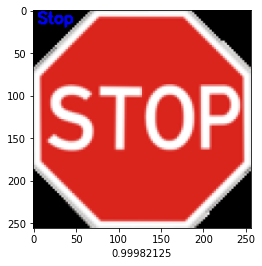

In [112]:
import cv2
from moviepy.editor import VideoFileClip
import numpy as np
import os
import glob
import imutils
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

IMG_SIZ = 32
IMG_CHANNEL = 3
MODE=2 #1- iamgefromtest , 2- iamge ,3-image but not forcus sign, 4 video
model = tf.keras.models.load_model("/content/drive/MyDrive/Traffic_sign_Recognition/ngocnet.h5")
i=200
if MODE==1:
  plt.figure(figsize=(20,20))
  for j in range(8):
    i=j+823
    result = model.predict(testX[i:i+1])
    predicted_label = np.argmax(result)
    image = imutils.resize(testX[i], width=32)
    plt.subplot(4,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title(classNames[predicted_label])
    plt.xlabel(np.max(result))
  plt.show()

if MODE==2:
  img=cv2.imread("14.png",cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img, cmap=plt.cm.binary)
  img = cv2.resize(img, (IMG_SIZ, IMG_SIZ))
  img = np.asarray(img)
  img = img.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
  img = img.astype("float")/255.0
  result = model.predict(img)
  predicted_label = np.argmax(result)
  print(result)
  print('acc',np.max(result))
  print(classNames[predicted_label])
  image = cv2.imread("14.png",cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = imutils.resize(image, width=256)
  cv2.putText(image, classNames[predicted_label], (5, 15), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 0, 255), 2)
  plt.xlabel(np.max(result))
  plt.imshow(image)
  #cv2.imshow(img)
  cv2.waitKey(0)
if MODE==3:
  targetImage = cv2.imread('anh12.PNG',cv2.COLOR_BGR2RGB)
  targetImage = cv2.cvtColor(targetImage, cv2.COLOR_BGR2RGB)
  #targetImage = cv2.GaussianBlur(targetImage, (15, 15), 0)

  targetImage = imutils.resize(targetImage, width=500)

  prototypeImg = cv2.imread('anh1.png',cv2.COLOR_BGR2RGB)
  prototypeImg = cv2.cvtColor(prototypeImg, cv2.COLOR_BGR2RGB)
  prototypeImg  = imutils.resize(prototypeImg , height=32,width=32)
  (tempH, tempW) =prototypeImg.shape[:2]
  result = cv2.matchTemplate(targetImage, prototypeImg, cv2.TM_CCOEFF)
  (minVal, maxVal, minLoc, (x, y)) = cv2.minMaxLoc(result)
  buff=15
  cv2.rectangle(targetImage, (x-buff, y-buff), (x + tempW+buff, y + tempH+buff), (0, 255, 0), 2)
  plt.figure(0)
  plt.imshow(targetImage)
  region= targetImage[ (y-buff):(y + tempH+buff), (x-buff):(x + tempW+buff)]
  region_c = cv2.resize(region,(IMG_SIZ, IMG_SIZ))
  region_c = np.asarray(region_c)
  region_c = region_c.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
  region_c = region_c.astype("float")/255.0
  #print("size region", region.shape)
  result = model.predict(region_c)
  final = np.argmax(result)
  arr= np.max(result)
  final = classNames[final]
  plt.figure(1)
  region = cv2.resize(region,(128, 128))
  cv2.putText(region, final, (5, 15), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 0, 255), 2)
  plt.xlabel(arr)
  plt.imshow(region)
  print("future : ",final) 
  cv2.waitKey(0)
if MODE==4:
# change the video path here
  cap = cv2.VideoCapture("/content/drive/.shortcut-targets-by-id/1wz_2ypEoa_Relsw44iZcPD-JL0VtGjRt/Traffic_sign_Recognition/bien3.mp4")
  i= 0
  k=0

  square=160
  #check=[]
  check = [None] * 10000
  while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
      break
    print(frame.shape)
    frame = np.asarray(frame)
    size=frame.shape 
    #size = [161,161]
    
    for i in range(0, size[0] -square):
      for j in range(0, size[1] - square):
        region= frame[i:i+square,j:j+square]
        region = cv2.resize(region,(IMG_SIZ, IMG_SIZ))
        region = np.asarray(region)
        region = region.reshape(-1, IMG_SIZ, IMG_SIZ, IMG_CHANNEL)
        region = region.astype("float")/255.0
        #print("size region", region.shape)
        
        result = model.predict(region)
        final = np.argmax(result)
        arr= np.max(result)
        #arr= double(arr)
        #print(arr)
        
        if arr > 0.95:
          final = classNames[final]
          check[k+1]=final
          if final != check[k]:
            plt.imshow(result)
            print("future : ",final)
    k=k+1